In [17]:
# importing pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import csv
import os
import numpy as np

In [18]:
# path to the client-hello-cipher-suites.csv file
# file_path = '../../../results/attributes/DNS/NEW_dns_transID_response_attributes.csv'
file_path = '../../../results/attributes/NTP/NEW_ntp_transmit_response_attributes.csv'

# path to the directory to save the plots
final_output_dir = '../../../results/attributes/NTP/transmitTS_plots'

In [19]:
# df = pd.read_csv(file_path, sep='|')
# df.head()

In [20]:
import csv
csv.field_size_limit(10 * 1024 * 1024)

# Read the CSV file and extract data
device_transID = {}
with open(file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for i, row in enumerate(csvreader):
        # print(row)
        if i == 0:
            continue
        device = row[0].split('|')[0]
        # print(f'device: {device}')
        transIDs = row[0].split('|')[1].split('__')[1:]

        device_transID[device] = transIDs
        # print(f'devicess: {devices}')
            
        #     print(row[0])
        #     qnumber_dicts = row
            # continue

# device_transID['AwairAirQuality'] = ['0000']
# device_transID['LiFXBulb'] = ['0000']

for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

# # Create a dictionary to store qnumbers for each device
# device_qnumbers = {}
# for i, device_list in enumerate(devices):
#     for j, device in enumerate(device_list):
#         qnumber_dict = qnumber_dicts[i][j]
#         transaction_id = qnumber_dict['transaction id']
#         qnumbers = list(qnumber_dict.keys())
#         qnumbers.remove('transaction id')
        
#         if device not in device_qnumbers:
#             device_qnumbers[device] = []
#         device_qnumbers[device].extend(qnumbers)

# # Print the resulting dictionary
# for device, qnumbers in device_qnumbers.items():
#     print(f"Device: {device}, Qnumbers: {qnumbers}")


key: AwairAirQuality, value: ['dbd5ba43cb47498b', 'dbd87966f60202a1', 'dbe71a89dd7aea5f', 'dbcf7c19cfa7de79', 'dbdbe6ebe088559b', 'dbec5996f0d3abcb', 'dbd5c858f10cf765', 'dbe309e4efff558e', 'dbdb05eadfb1272c', 'dbdcabccc6fea715', 'dbcfb358ecb04ab6', 'dc6222912514133c', 'dbe4e80740ed6912', 'dbeac1c4f9986ce4', 'dbe1b863858e0e2a', 'dbe1feb3c80a2319', 'dbd2deff80dc9cd7', 'dbcf51e9a3818d8b', 'dbe6fe69bd457248', 'dbd67f2497883141', 'dbcfeb9e9d5b9c8d', 'dbcfc16e71190f69', 'dbe009e989bafe09', 'dbdaa37f6dd4d179', 'dbe44d56885be711', 'dbe0f38291261e3e', 'dbe590c80736c490', 'dbdd548d99562b9c', 'dbd2566190dcd000', 'dbd023dee1884deb', 'dbdb5a4b378d6d9d', 'dbe8c06bd8f69232', 'dbee61e9789caed0', 'dbcfdd938e822a5a', 'dbdabf9a962081b4', 'dbde9c47b34c2986', 'dbcff9aec4642939', 'dbe582b803dad631', 'dbcf19a3fb5c34b7', 'dc62a121c7f1b1dc', 'dbdf7d48e18dc099', 'dbe253143f48ca70', 'dbdb4c3b21a45436', 'dbdc111c0d1c97f3', 'dbed64c82fa29b35', 'dbdd1c4d5ae58d7b', 'dbd53bb337e8202d', 'dbe07a6a006c3878', 'dbcf8a2ef

## Data Pre-Processing

In [21]:
def hex_to_decimal(hex_number):
    try:
        decimal_number = int(hex_number, 16)
        return decimal_number
    except ValueError:
        raise ValueError("Invalid hexadecimal number")

In [22]:
import struct
from datetime import datetime, timedelta

def hex_to_ntp_timestamp(hex_timestamp):
    # Convert the hexadecimal string to a 64-bit integer
    ntp_int = int(hex_timestamp, 16)
    
    # Calculate seconds and fractional seconds
    seconds = ntp_int >> 32
    fractional = ntp_int & 0xFFFFFFFF
    
    # Convert to datetime
    ntp_epoch = datetime(1900, 1, 1)
    ntp_time = ntp_epoch + timedelta(seconds=seconds, microseconds=(fractional * 1e6 / 0xFFFFFFFF))
    
    return ntp_time




In [23]:
for device, transID_list in device_transID.items():
    print(f'device: {device}')
    newList = []
    for i, transID in enumerate(transID_list):
        if transID == 'None' or transID == 'nan': continue
        # print(f'i: {i}, transID: {transID}')
        # for ci, c in enumerate(cs):
        dec_val = hex_to_ntp_timestamp(transID)
        # print(f'hex_val: {dec_val}')
        # cs[ci] = hex_val
        # transID_list[i] = math.log2(dec_val)
        # transID_list[i] = dec_val
        # print(type(dec_val))
            
        # newList.append(new_val)  
        newList.append(dec_val)  
    
    # device_transID[device] = newList
    device_transID[device] = sorted(newList)


# # Example hex transmit timestamp
# hex_timestamp = "dbd5ba43cb47498b"  # Replace with your hex value

# ntp_time = hex_to_ntp_timestamp(hex_timestamp)
# print("NTP Time:", ntp_time)
for k, v in device_transID.items():
    print(f'key: {k}, value: {v}')

device: AwairAirQuality
device: LiFXBulb
device: PixStarPhotoFrame
device: RingDoorBell
device: TPLinkCamera
device: TribySpeaker
device: AmazonEcho
device: WithingsSleepSensor
device: SamsungCamera
device: WithingsBabyMonitor
key: AwairAirQuality, value: [datetime.datetime(2016, 11, 10, 11, 28, 41, 392489), datetime.datetime(2016, 11, 10, 12, 28, 47, 806868), datetime.datetime(2016, 11, 10, 13, 28, 47, 876907), datetime.datetime(2016, 11, 10, 14, 28, 47, 930271), datetime.datetime(2016, 11, 10, 15, 28, 48, 145926), datetime.datetime(2016, 11, 10, 16, 6, 59, 981876), datetime.datetime(2016, 11, 10, 17, 7, 5, 445589), datetime.datetime(2016, 11, 10, 18, 7, 5, 488981), datetime.datetime(2016, 11, 10, 19, 7, 5, 572705), datetime.datetime(2016, 11, 10, 20, 7, 5, 638696), datetime.datetime(2016, 11, 10, 21, 7, 5, 771550), datetime.datetime(2016, 11, 10, 22, 7, 5, 757119), datetime.datetime(2016, 11, 10, 23, 7, 5, 811155), datetime.datetime(2016, 11, 11, 0, 7, 10, 996952), datetime.datetime(

In [24]:
# calculating the intervals
device_transID_intervals = {}
for device, IDList in device_transID.items():
    if len(IDList) < 1:
        continue
    newList = []
    # print(device)
    prev = IDList[0]
    for id in IDList:
        newList.append((id - prev).total_seconds())
        prev = id
    device_transID_intervals[device] = newList[1:]

In [25]:
for k, v in device_transID_intervals.items():
    print(f'key: {k}, value: {v}')

key: AwairAirQuality, value: [3606.414379, 3600.070039, 3600.053364, 3600.215655, 2291.83595, 3605.463713, 3600.043392, 3600.083724, 3600.065991, 3600.132854, 3599.985569, 3600.054036, 3605.185797, 3594.95802, 3600.405189, 3342.564404, 3605.517224, 3600.201655, 3604.91323, 3595.058005, 3600.152474, 3600.030869, 7200.082964, 14400.261918, 14400.290456, 3600.124239, 3600.009973, 32400.598594, 10800.170838, 18005.34615, 32395.597995, 3600.06076, 7200.23354, 3599.99042, 3600.062328, 3600.133256, 3600.150857, 18000.248022, 6173.343034, 97202.503277, 14400.457039, 10800.155485, 3599.902046, 3600.156187, 3600.084684, 7200.233354, 14400.222948, 3600.141001, 3604.984092, 17995.265769, 7200.184809, 3605.147547, 3594.989293, 36000.535849, 7200.125176, 7200.239552, 7200.151087, 3600.022312, 104401.819303, 7200.136792, 43200.896162, 7200.039297, 28800.624208, 7200.142147, 36000.693088, 3599.922271, 12241.014108, 3605.13678, 3594.982996, 3600.174409, 18000.287363, 18000.257617, 3600.085588, 21600.46

## Plotting

In [26]:
def plot_list_as_line_plt(lst2D, save_name):
    x_values = 0
    # for i, cs in enumerate(lst2D):
    # if len(cs) <= 1:
        # print(f'case')
        # continue
        # return
    x_values = list(range(len(lst2D)))  # Use list indices as x-axis
    x_values = [x + 1 for x in x_values]
    y_values = lst2D  # Use list items as y-axis
    
    # general config for plots with more than 1 graph
    # if i==0:
    #     linstl = '-'
    #     mkr = 'o'
    #     clr = 'b'
    # if i==1:
    #     linstl = ':'
    #     mkr = '*'
    #     clr = 'y'
        
    # # specific configs for required devices
    # if save_name == 'LiFXBulb':  # LiFXBulb
    #     linstl = '--'
    #     mkr = '^'
    #     clr = 'c'
    # elif save_name == 'TPLinkCamera':  # TPLinkCamera
    #     linstl = '-.'
    #     mkr = 'x'
    #     clr = 'r'

    linstl = '-'
    mkr = '.'
    clr = 'b'
    ssiizzee = 2
    if save_name == 'RingDoorBell' or save_name == 'TPLinkCamera' or save_name == 'TribySpeaker':
        ssiizzee = 20
    # plt.plot(x_values, y_values, marker=mkr, linestyle=linstl, color=clr)
    # plt.scatter(x_values, y_values, color=clr, marker=mkr, label='Data Points', s=ssiizzee)


    ###################################################################################################
    # HIST
    # n, bins, _ = plt.hist(y_values, bins=20, density=True, edgecolor='black')
    # print(f'n: {n}')
    # print(f'sum(n): {sum(n)*20}')
    # print(f'bins: {bins}')

    binss = range(0, 100000, 1000)
    # Create a histogram with probabilities
    n, bins, _ = plt.hist(y_values, bins=binss, density=True, alpha=0.7)

    # Calculate bin widths
    bin_widths = bins[1] - bins[0]

    # Calculate relative frequencies (probabilities) for each bin
    probabilities = n * bin_widths

    # Plot the histogram with probabilities
    plt.clf()  # Clear previous plot
    plt.bar(bins[:-1], probabilities, width=bin_widths, align='edge', alpha=0.7)
    print(f'bins: {bins}')
    print(f'n: {n}')

    ###################################################################################################
    
    plt.xlabel('Order')
    plt.ylabel('Transmit timestamp')
    # plt.title('Line Plot from List')
    plt.grid(True)

    x_values = np.array(x_values)
    even_xticks = x_values[x_values % 1000 == 0]  # to get the x-axis grid lines
    # plt.xticks(even_xticks)
    
    # if len(x_values) <= 25:
    #     plt.xticks(range(len(x_values)), [int(x) for x in x_values])
    # elif len(x_values) <= 50:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 2 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 75:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 3 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)
    # elif len(x_values) <= 100:
    #     x_values = np.array(x_values)
    #     even_xticks = x_values[x_values % 5 == 0]  # to get the x-axis grid lines
    #     plt.xticks(even_xticks)

    plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
    plt.show()

# def plot_list_as_line_sns(lst2D, save_name):
#     x_values = list(range(len(lst)))  # Use list indices as x-axis
#     y_values = lst  # Use list items as y-axis

#     sns.lineplot(x=x_values, y=y_values, marker='o', color='b')
#     plt.xlabel('Index')
#     plt.ylabel('Value')
#     plt.title('Line Plot from List')
#     plt.grid(True)

#     plt.savefig(os.path.join(final_output_dir, save_name), format='pdf')  # save
#     plt.show()


In [27]:
def remove_outliers(data, outlier_coefficient=1.5):
    # Calculate the IQR
    sorted_data = sorted(data)
    q1, q3 = sorted_data[int(len(sorted_data) * 0.25)], sorted_data[int(len(sorted_data) * 0.75)]
    iqr = q3 - q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = q1 - outlier_coefficient * iqr
    upper_bound = q3 + outlier_coefficient * iqr
    
    # Remove outliers
    cleaned_data = [value for value in data if ((value <= upper_bound))]
    # cleaned_data = [value for value in data if ((lower_bound <= value) and (value <= upper_bound))]
    
    return cleaned_data

device: AwairAirQuality, len(css): 189
device: TPLinkCamera, len(css): 40
device: AmazonEcho, len(css): 16292
device: SamsungCamera, len(css): 428


/home/savinduwannigama/.local/lib/python3.10/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


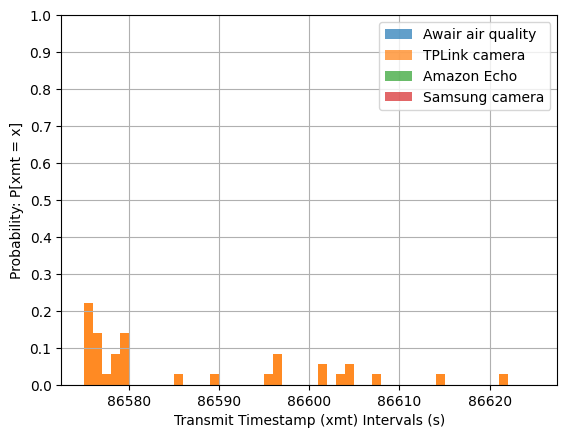

In [46]:
device_g01 = ['AwairAirQuality', 'TPLinkCamera', 'AmazonEcho', 'SamsungCamera']

binss0 = range(0, 150000, 1000)
binss1 = range(0, 90000, 1000)
binss2 = range(0, 20000, 500)
binss3 = range(0, 1000, 100)
binss4 = range(86575, 86626, 1)
# binss4 = range(0, 1, .01)

for device, css in device_transID_intervals.items():
    if device not in device_g01:
        continue
    print(f'device: {device}, len(css): {len(css)}')

    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    # print(f'device_name: {device_name}')

    clean_data = css
    # clean_data = remove_outliers(css, 0)

    # Create a histogram with probabilities
    n, bins, _ = plt.hist(clean_data, bins=binss4, density=True, alpha=0.7)  # binss1

    # Calculate bin widths
    bin_widths = bins[1] - bins[0]

    # Calculate relative frequencies (probabilities) for each bin
    probabilities = n * bin_widths

    # Plot the histogram with probabilities
    # plt.clf()  # Clear previous plot
    if device == 'AwairAirQuality':
        labell = 'Awair air quality'
    elif device == 'TPLinkCamera':
        labell = 'TPLink camera'
    elif device == 'AmazonEcho':
        labell = 'Amazon Echo'
    elif device == 'SamsungCamera':
        labell = 'Samsung camera'
    plt.bar(bins[:-1], probabilities, width=bin_widths, align='edge', alpha=0.7, label=labell)

    # break


# plt.xticks(range(0, 90001, 5000), rotation='vertical')
# plt.xlim(0, 90000)

plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])

plt.xlabel('Transmit Timestamp (xmt) Intervals (s)')
plt.ylabel('Probability: P[xmt = x]')
# plt.title('Line Plot from List')
plt.grid(True)
plt.legend()

plt.savefig(os.path.join(final_output_dir, 'delta_transmit_timestamp.pdf'), format='pdf')  # save
plt.show()



len of css: 189, len of clean_data: 189
percentage remaining: 100.0%
device: AwairAirQuality, clean_data: [3606.414379, 3600.070039, 3600.053364, 3600.215655, 2291.83595, 3605.463713, 3600.043392, 3600.083724, 3600.065991, 3600.132854, 3599.985569, 3600.054036, 3605.185797, 3594.95802, 3600.405189, 3342.564404, 3605.517224, 3600.201655, 3604.91323, 3595.058005, 3600.152474, 3600.030869, 7200.082964, 14400.261918, 14400.290456, 3600.124239, 3600.009973, 32400.598594, 10800.170838, 18005.34615, 32395.597995, 3600.06076, 7200.23354, 3599.99042, 3600.062328, 3600.133256, 3600.150857, 18000.248022, 6173.343034, 97202.503277, 14400.457039, 10800.155485, 3599.902046, 3600.156187, 3600.084684, 7200.233354, 14400.222948, 3600.141001, 3604.984092, 17995.265769, 7200.184809, 3605.147547, 3594.989293, 36000.535849, 7200.125176, 7200.239552, 7200.151087, 3600.022312, 104401.819303, 7200.136792, 43200.896162, 7200.039297, 28800.624208, 7200.142147, 36000.693088, 3599.922271, 12241.014108, 3605.13678

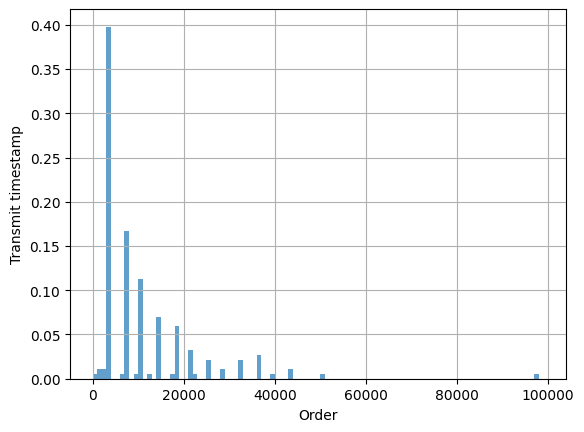

len of css: 1116, len of clean_data: 1116
percentage remaining: 100.0%
device: LiFXBulb, clean_data: [299.900361, 300.077146, 4.909306, 295.091524, 4.910486, 295.089673, 299.905654, 299.995704, 299.994731, 300.079591, 600.302287, 299.706609, 299.973639, 299.924801, 305.018529, 295.070489, 299.965872, 300.0058, 300.010912, 300.0058, 300.039217, 299.920201, 299.933495, 299.986872, 300.085436, 299.99437, 900.050206, 600.009668, 299.936119, 299.999201, 300.068798, 299.852196, 300.071688, 599.975583, 300.058521, 899.870735, 300.070344, 299.907124, 304.991377, 295.098762, 599.990789, 599.984053, 899.991648, 300.013336, 299.969297, 300.033923, 599.971258, 899.926694, 300.07711, 5.047675, 594.840068, 300.078164, 600.012461, 899.999836, 299.889808, 300.09351, 300.006131, 299.96045, 599.922895, 605.021426, 295.066397, 299.907251, 300.090433, 600.026491, 300.012149, 299.950167, 299.976614, 900.002239, 899.998533, 300.063697, 299.859525, 1199.959619, 900.071568, 299.943389, 300.064844, 900.044864,

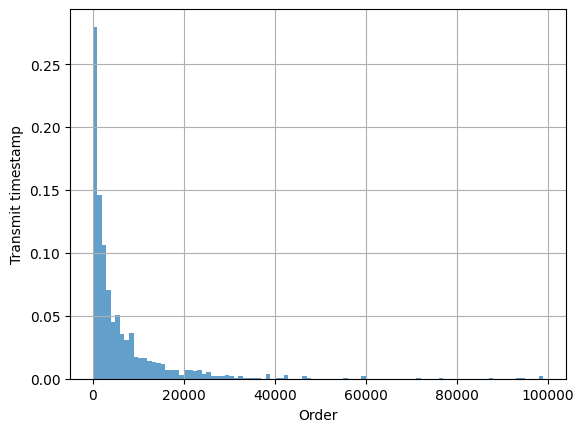

len of css: 25, len of clean_data: 25
percentage remaining: 100.0%
device: RingDoorBell, clean_data: [586728.755174, 885591.324578, 134.880075, 536.426438, 57.114239, 62922.26465, 61332.21611, 82862.590415, 94712.503361, 77177.300593, 79518.640811, 97685.947156, 82131.539689, 168697.610462, 102100.506135, 84881.891377, 83278.706181, 81269.861575, 89094.099311, 91896.607706, 71666.871948, 93768.506766, 78159.245967, 104079.524886, 34669.847366]
bins: [    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000. 21000. 22000. 23000. 24000. 25000. 26000. 27000. 28000. 29000.
 30000. 31000. 32000. 33000. 34000. 35000. 36000. 37000. 38000. 39000.
 40000. 41000. 42000. 43000. 44000. 45000. 46000. 47000. 48000. 49000.
 50000. 51000. 52000. 53000. 54000. 55000. 56000. 57000. 58000. 59000.
 60000. 61000. 62000. 63000. 64000. 65000. 66000. 67000. 68000. 69000.
 70000. 71000. 72000. 73000. 74000. 75000. 76000.

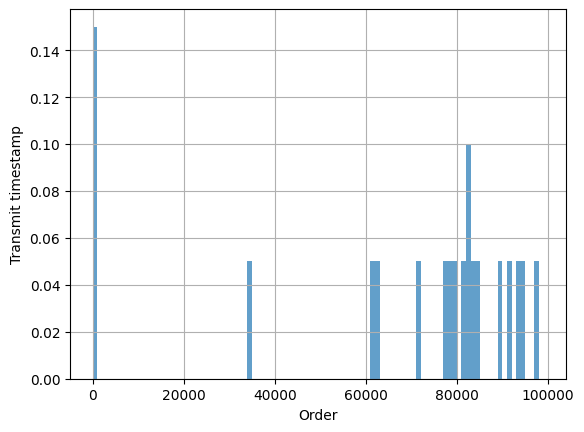

len of css: 40, len of clean_data: 40
percentage remaining: 100.0%
device: TPLinkCamera, clean_data: [86575.851407, 86601.884095, 86604.076186, 12854132.589382, 86589.130072, 9051.398191, 86576.257089, 86575.616922, 86575.380517, 86595.995881, 577776.504288, 86579.959552, 86575.485047, 86604.912755, 86576.330307, 86575.770064, 86596.253163, 86576.562218, 86579.422844, 86579.440428, 86596.988204, 86579.472805, 86578.494696, 86575.470013, 86607.398528, 86577.224722, 86603.77159, 86575.741553, 86585.432321, 173154.666996, 86578.103944, 86579.215993, 86621.728297, 86578.788876, 86601.264847, 86596.159109, 86576.08308, 86575.436742, 86614.388187, 86576.005895]
bins: [    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000. 16000. 17000. 18000. 19000.
 20000. 21000. 22000. 23000. 24000. 25000. 26000. 27000. 28000. 29000.
 30000. 31000. 32000. 33000. 34000. 35000. 36000. 37000. 38000. 39000.
 40000. 41000. 42000. 43000. 44000. 45000. 460

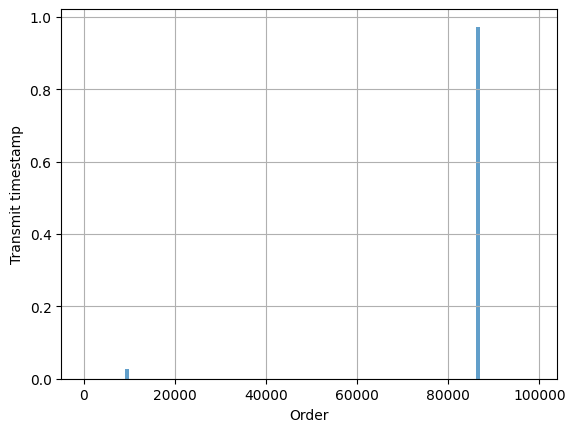

len of css: 110, len of clean_data: 110
percentage remaining: 100.0%
device: TribySpeaker, clean_data: [0.21498, 0.184123, 43276.000018, 0.200475, 0.253162, 0.211546, 43252.226804, 0.183906, 0.224964, 0.231761, 43237.914334, 0.177568, 0.225526, 2.979871, 43210.79521, 43320.828295, 43324.735385, 43261.800598, 0.438522, 43368.566006, 43200.380869, 43267.01303, 82674.372432, 43205.40387, 0.198399, 0.144003, 0.249629, 43203.346352, 0.11532, 50.755596, 0.176858, 129742.91293, 86421.900758, 0.182028, 0.193581, 0.201087, 86494.600457, 172915.793377, 0.222971, 14.501665, 43234.857298, 288303.073532, 24.653704, 43211.3502, 129725.004916, 0.432059, 0.556369, 43363.39273, 129854.975968, 761243.232951, 216009.398812, 302408.909283, 86401.948273, 43203.343246, 0.188201, 0.217343, 0.203582, 43204.900898, 0.203658, 0.265156, 107570.284536, 216339.344856, 43436.05261, 328179.146468, 43382.387047, 0.394436, 0.166972, 43196.782495, 0.334955, 0.402025, 606059.416774, 43208.465224, 475723.127651, 3.061137

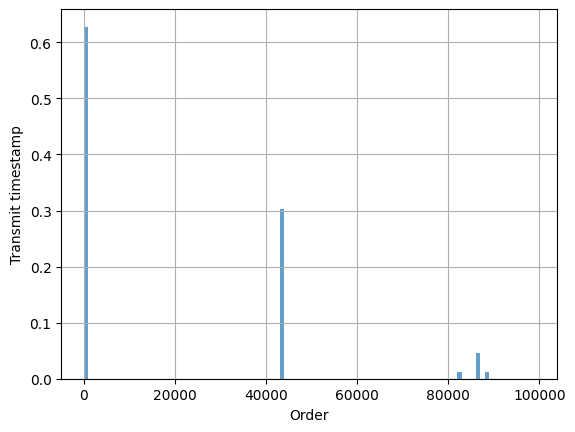

len of css: 16292, len of clean_data: 16292
percentage remaining: 100.0%
device: AmazonEcho, clean_data: [53.239114, 136.293096, 163.349031, 233.207586, 829.146245, 1552.870861, 879.017777, 613.282072, 937.211205, 27.301401, 728.63351, 70.601861, 714.626506, 109.234086, 419.142203, 1426.434604, 729.510678, 397.140757, 265.629788, 108.112196, 247.713305, 266.901363, 470.651013, 320.327274, 231.837005, 254.078384, 293.659492, 365.18068, 781.528661, 665.69114, 757.639728, 120.937157, 863.141951, 35.189432, 671.028202, 528.623383, 324.604452, 891.668573, 656.532011, 564.91256, 140.652681, 176.144189, 547.370362, 214.149402, 161.518769, 3669.17499, 72.237375, 590.478867, 282.861568, 390.743389, 1853.663531, 162.125733, 869.313241, 338.208398, 380.46252, 846.412228, 658.929048, 941.800233, 640.436892, 188.589989, 2172.570369, 861.931159, 666.736539, 833.462414, 803.793791, 762.136985, 182.965225, 501.962334, 406.364982, 243.319125, 371.796518, 1299.810531, 672.922406, 838.69051, 539.491258, 

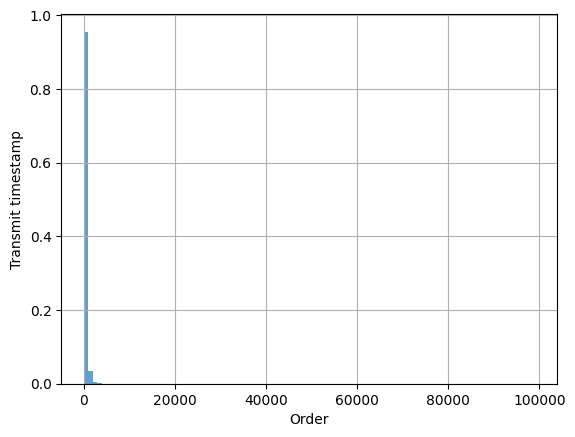

len of css: 428, len of clean_data: 428
percentage remaining: 100.0%
device: SamsungCamera, clean_data: [21606.290287, 21600.563372, 5.461593, 21600.519493, 21600.38443, 21600.59834, 21600.7506, 21600.416108, 21600.682715, 21600.626689, 21600.462744, 15801.240082, 21600.586723, 21600.439745, 21600.596959, 21600.676926, 21600.383421, 21600.393424, 21600.443993, 21600.535358, 21600.672604, 21605.700158, 21600.541946, 21600.384738, 21605.690021, 21605.658097, 21600.561553, 21600.352138, 21605.570301, 21600.867956, 21600.406113, 21600.597171, 21610.885581, 21600.472064, 21600.65225, 21600.510112, 21600.398838, 21600.386144, 21600.408024, 21600.570657, 21600.685303, 21600.567303, 21600.460793, 5.250073, 21600.546321, 21600.481438, 21600.76816, 21605.804134, 64812.536444, 21600.602775, 21600.6264, 21606.106588, 21605.753185, 21600.591648, 21600.436039, 8112.394741, 21600.583474, 21600.55996, 21600.546367, 21600.600317, 21600.392799, 21605.614717, 21600.528768, 21600.408125, 42656.966917, 216

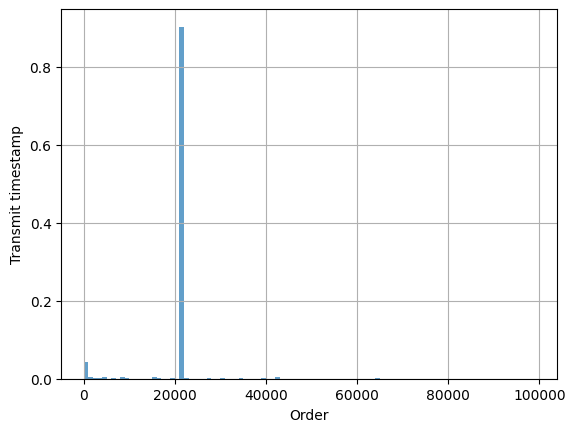

In [29]:
# plot_list_as_line_plt(dict01['AwairAirQuality'][0])
# plot_list_as_line_sns(dict01['AwairAirQuality'][0])
printed_devices = []
for device, css in device_transID_intervals.items():
    device_name = device
    # if '/' in device:
    #     device_name = device.split('/')[0]

    # if device_name in printed_devices:
    #     continue  
    # print(f'device_name: {device_name}')

    clean_data = css
    # clean_data = remove_outliers(css, 0)

    print(f'len of css: {len(css)}, len of clean_data: {len(clean_data)}')
    print(f'percentage remaining: {(len(clean_data)/len(css))*100}%')
    print(f'device: {device}, clean_data: {clean_data}')
    plot_list_as_line_plt(clean_data, device_name)
    printed_devices.append(device_name)
    # if len(css) < 1:
    #     print(f'device: {device} has 0 ciphersuites')
    #     continue
    # for csi, cs in enumerate(css):
    #     if len(cs) <= 1:
    #         print(f'device: {device}, cs: {csi} has 0 ciphers')
    #         continue
    #     if device_name in printed_devices:
    #         continue
    #     plot_list_as_line_plt(cs, device_name)
    #     printed_devices.append(device_name)

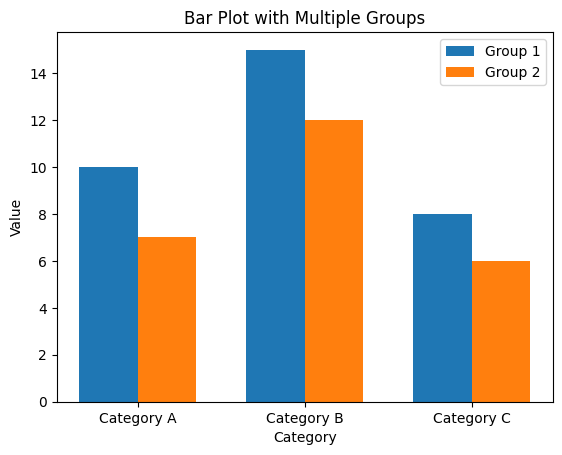

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Category A', 'Category B', 'Category C']
values_group1 = [10, 15, 8]
values_group2 = [7, 12, 6]

# Create x positions for the bars
x = np.arange(len(categories))

# Create a figure and axis
fig, ax = plt.subplots()

# Create bar plots for each group
bar_width = 0.35
bar1 = ax.bar(x - bar_width/2, values_group1, bar_width, label='Group 1')
bar2 = ax.bar(x + bar_width/2, values_group2, bar_width, label='Group 2')

# Set labels, title, and ticks
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Bar Plot with Multiple Groups')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.show()
